In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score ,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


Reading the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

base_path = '/content/drive/My Drive/Colab Notebooks/regressionProject'

Mounted at /content/drive


In [3]:

data_dir = os.path.join(base_path, 'kc_house_data.csv')


In [4]:
df = pd.read_csv(data_dir , parse_dates=['date'])

In [5]:

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.shape

(21613, 21)

In [8]:
df.drop("id",axis=1,inplace=True)

Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [10]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


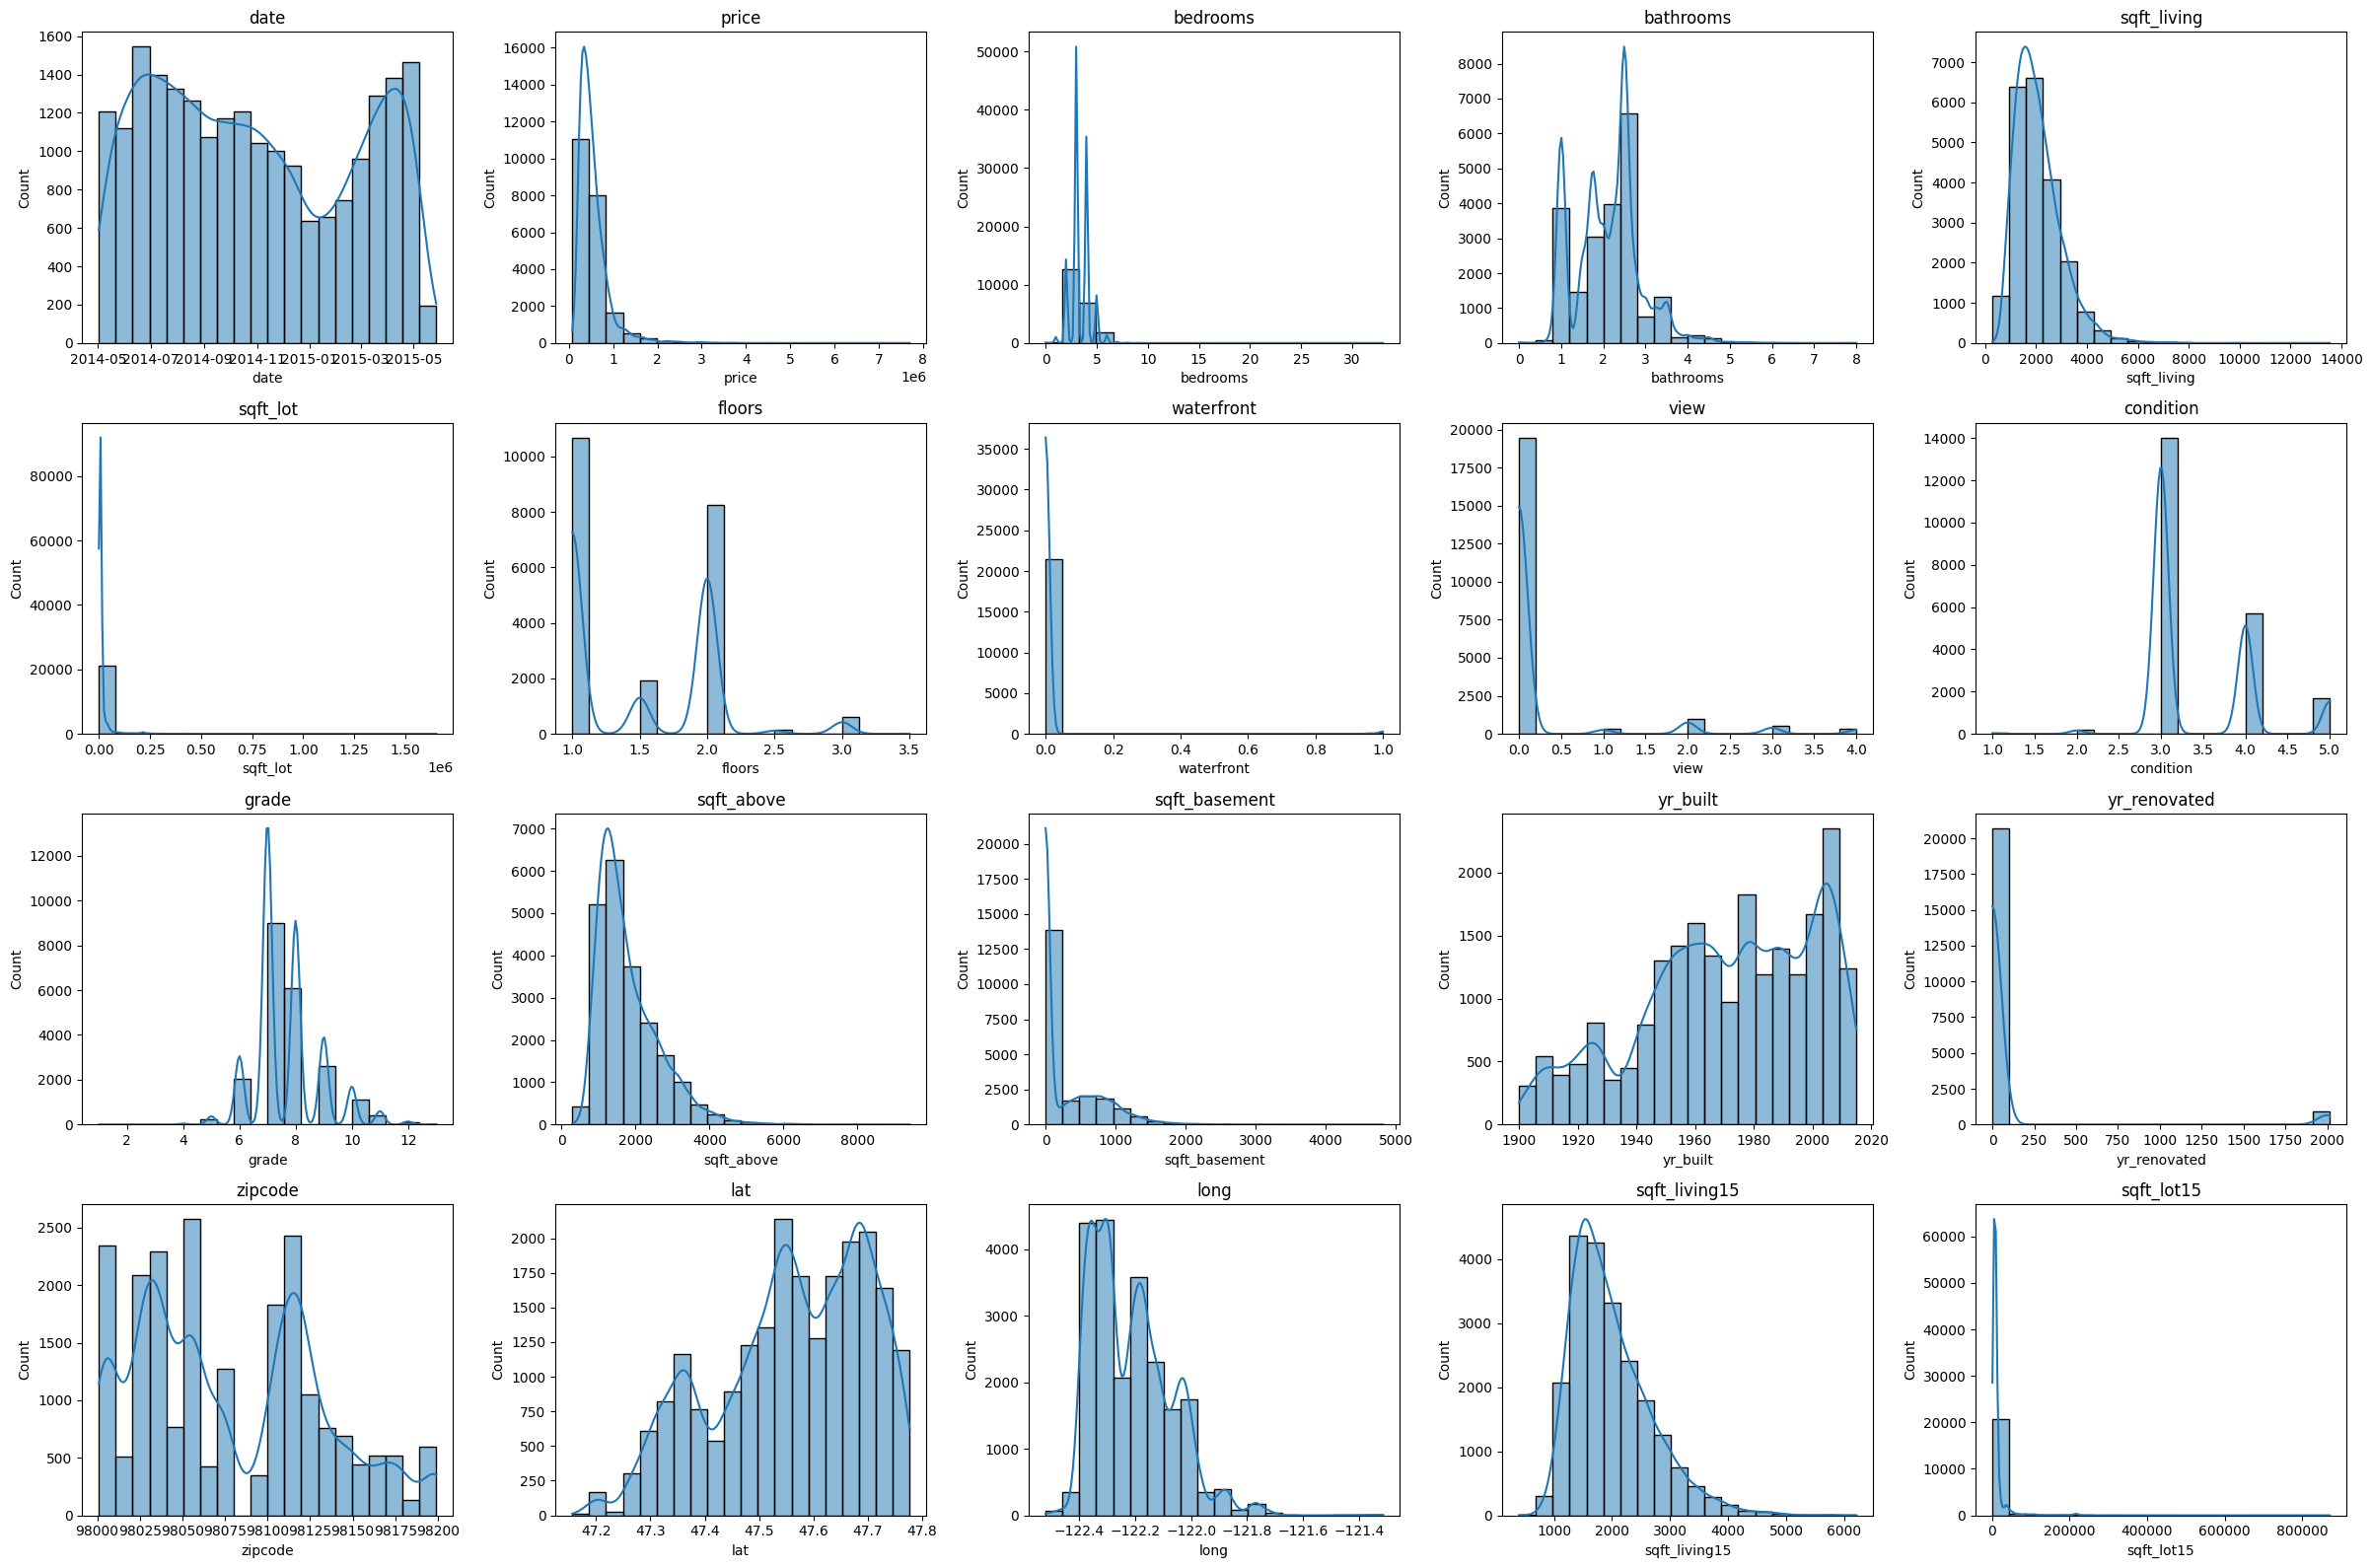

In [13]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [14]:
df["waterfront"].value_counts().reset_index()

,index,waterfront
0,0,21450
1,1,163


In [15]:
df["view"].value_counts().reset_index()

,index,view
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


In [16]:
df["yr_renovated"].value_counts().reset_index()

,index,yr_renovated
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35
...,...,...
65,1951,1
66,1959,1
67,1948,1
68,1954,1


In [17]:
#df["bedrooms"].value_counts().reset_index()

In [18]:
#df["bathrooms"].value_counts().reset_index()

Data Preparation

In [19]:
df.drop(["waterfront","view","zipcode","yr_renovated"],axis =1 ,inplace = True)

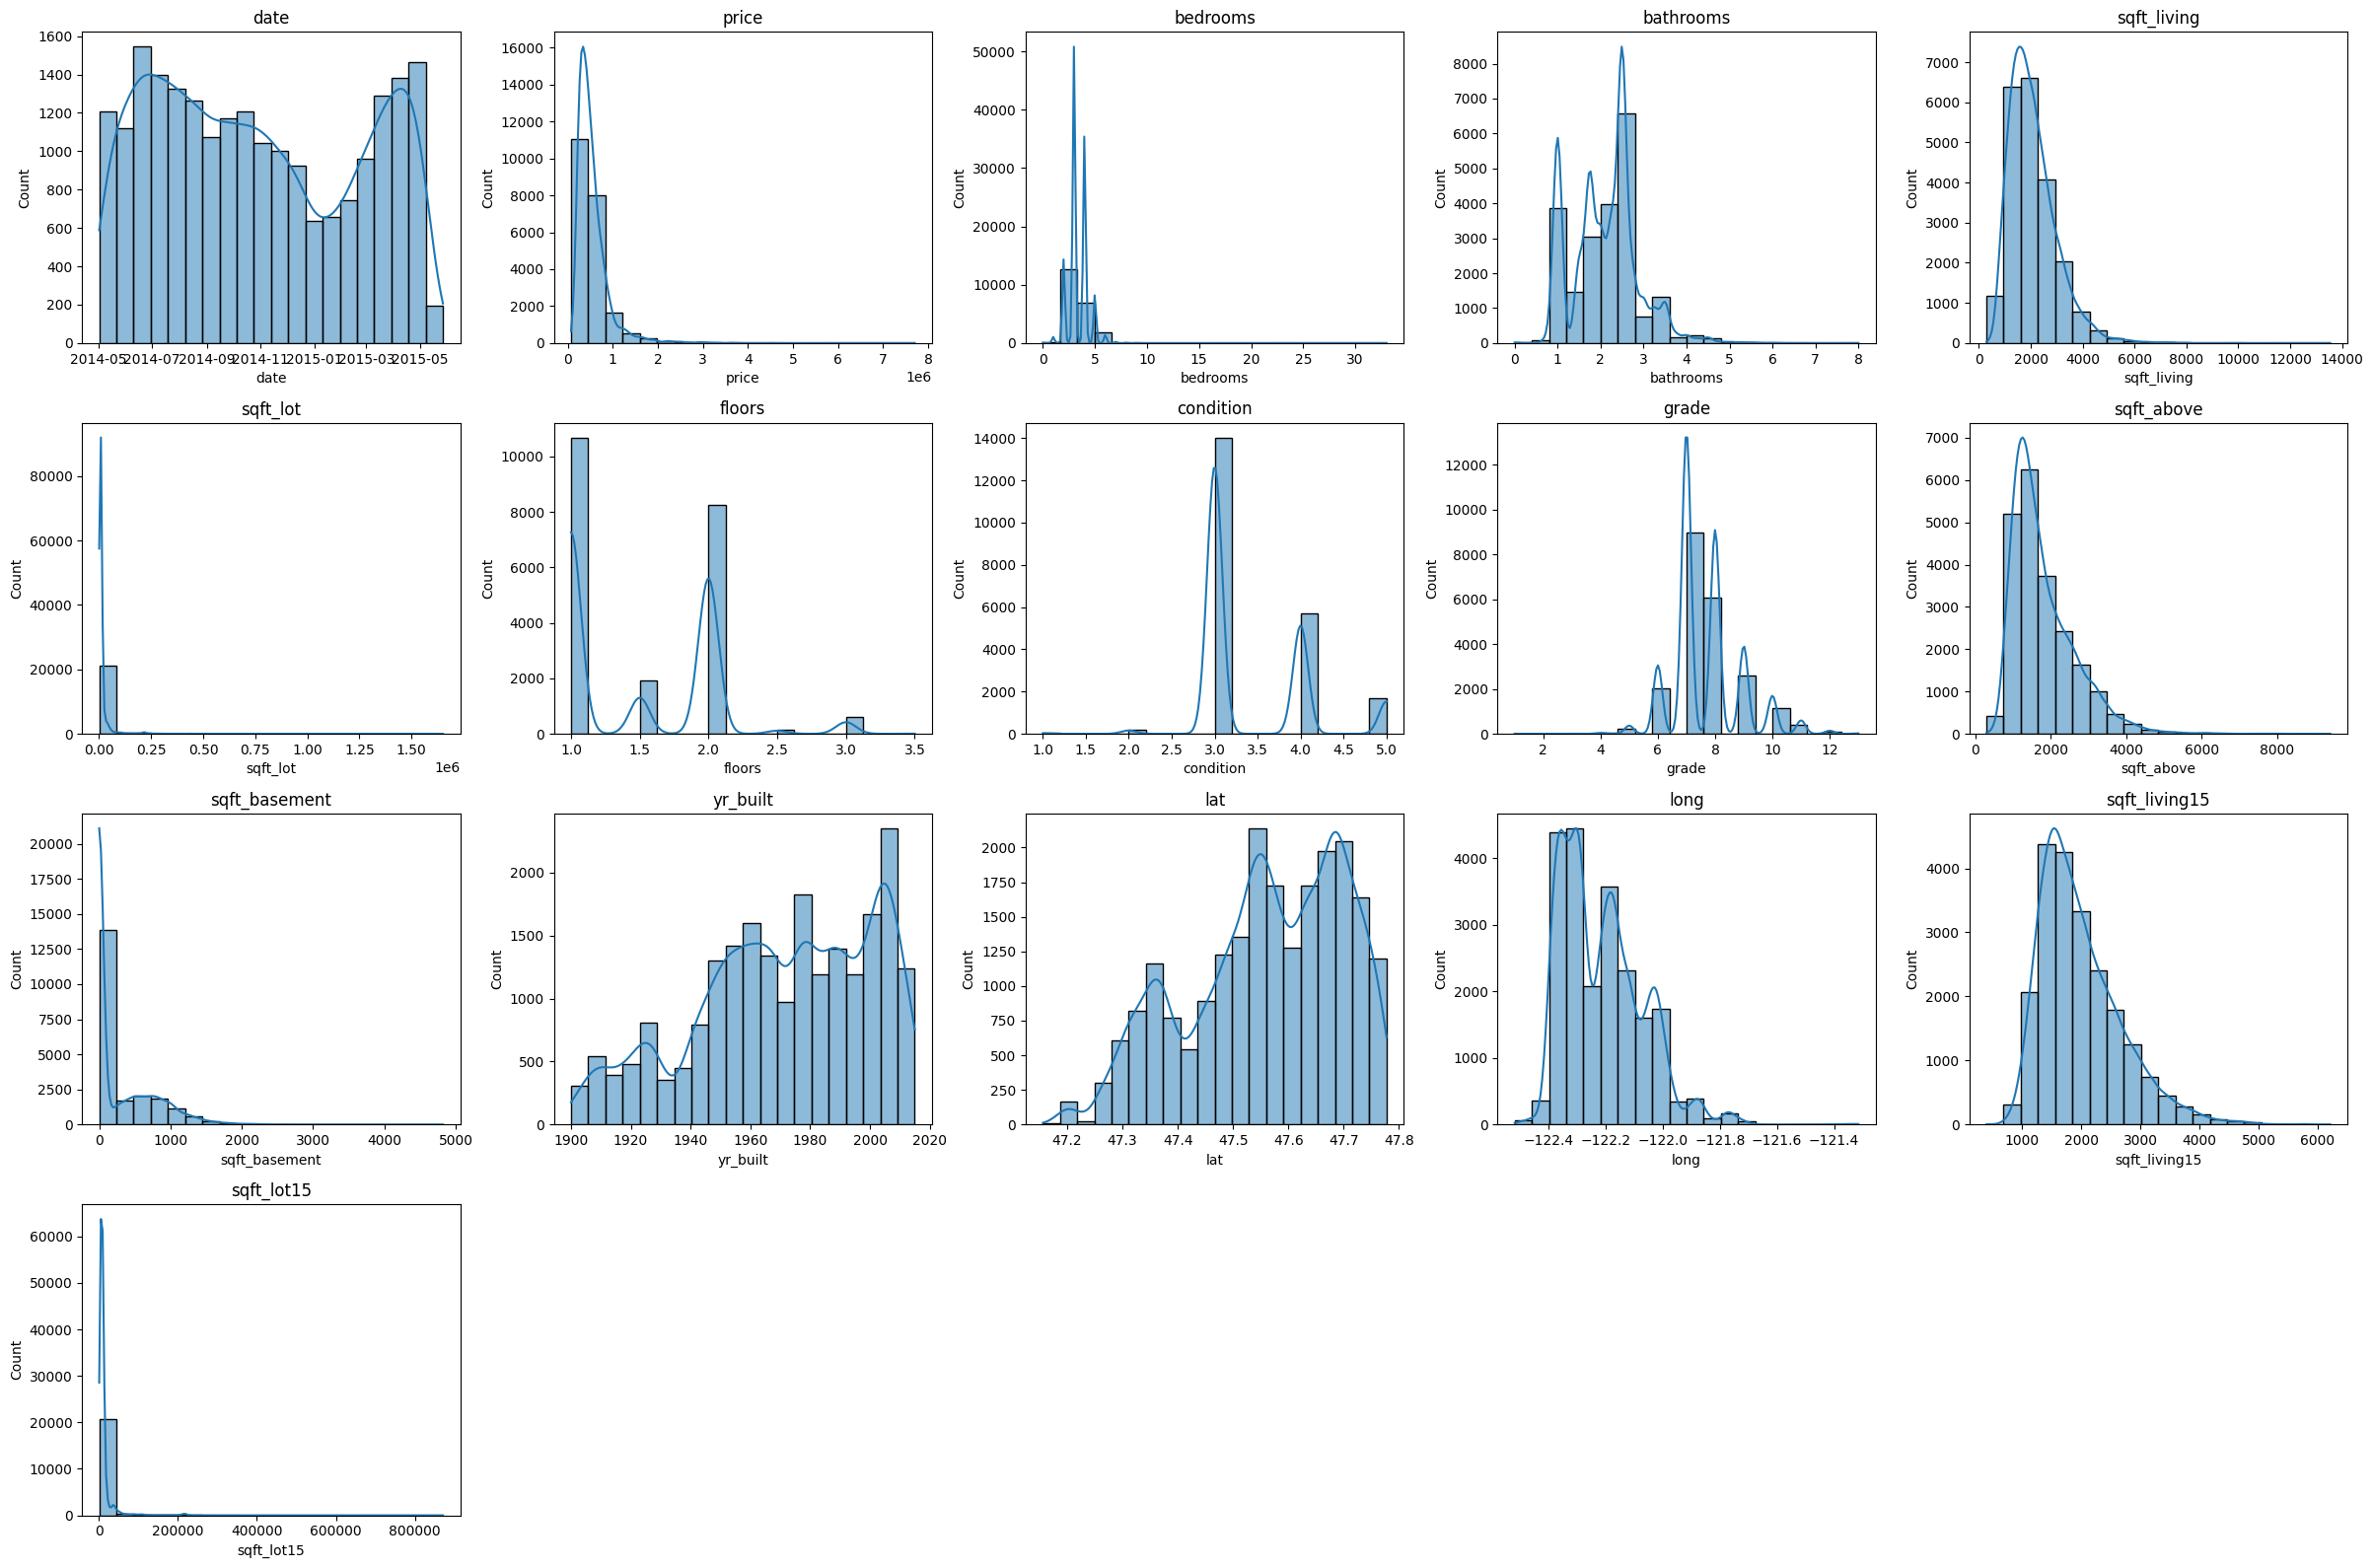

In [20]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

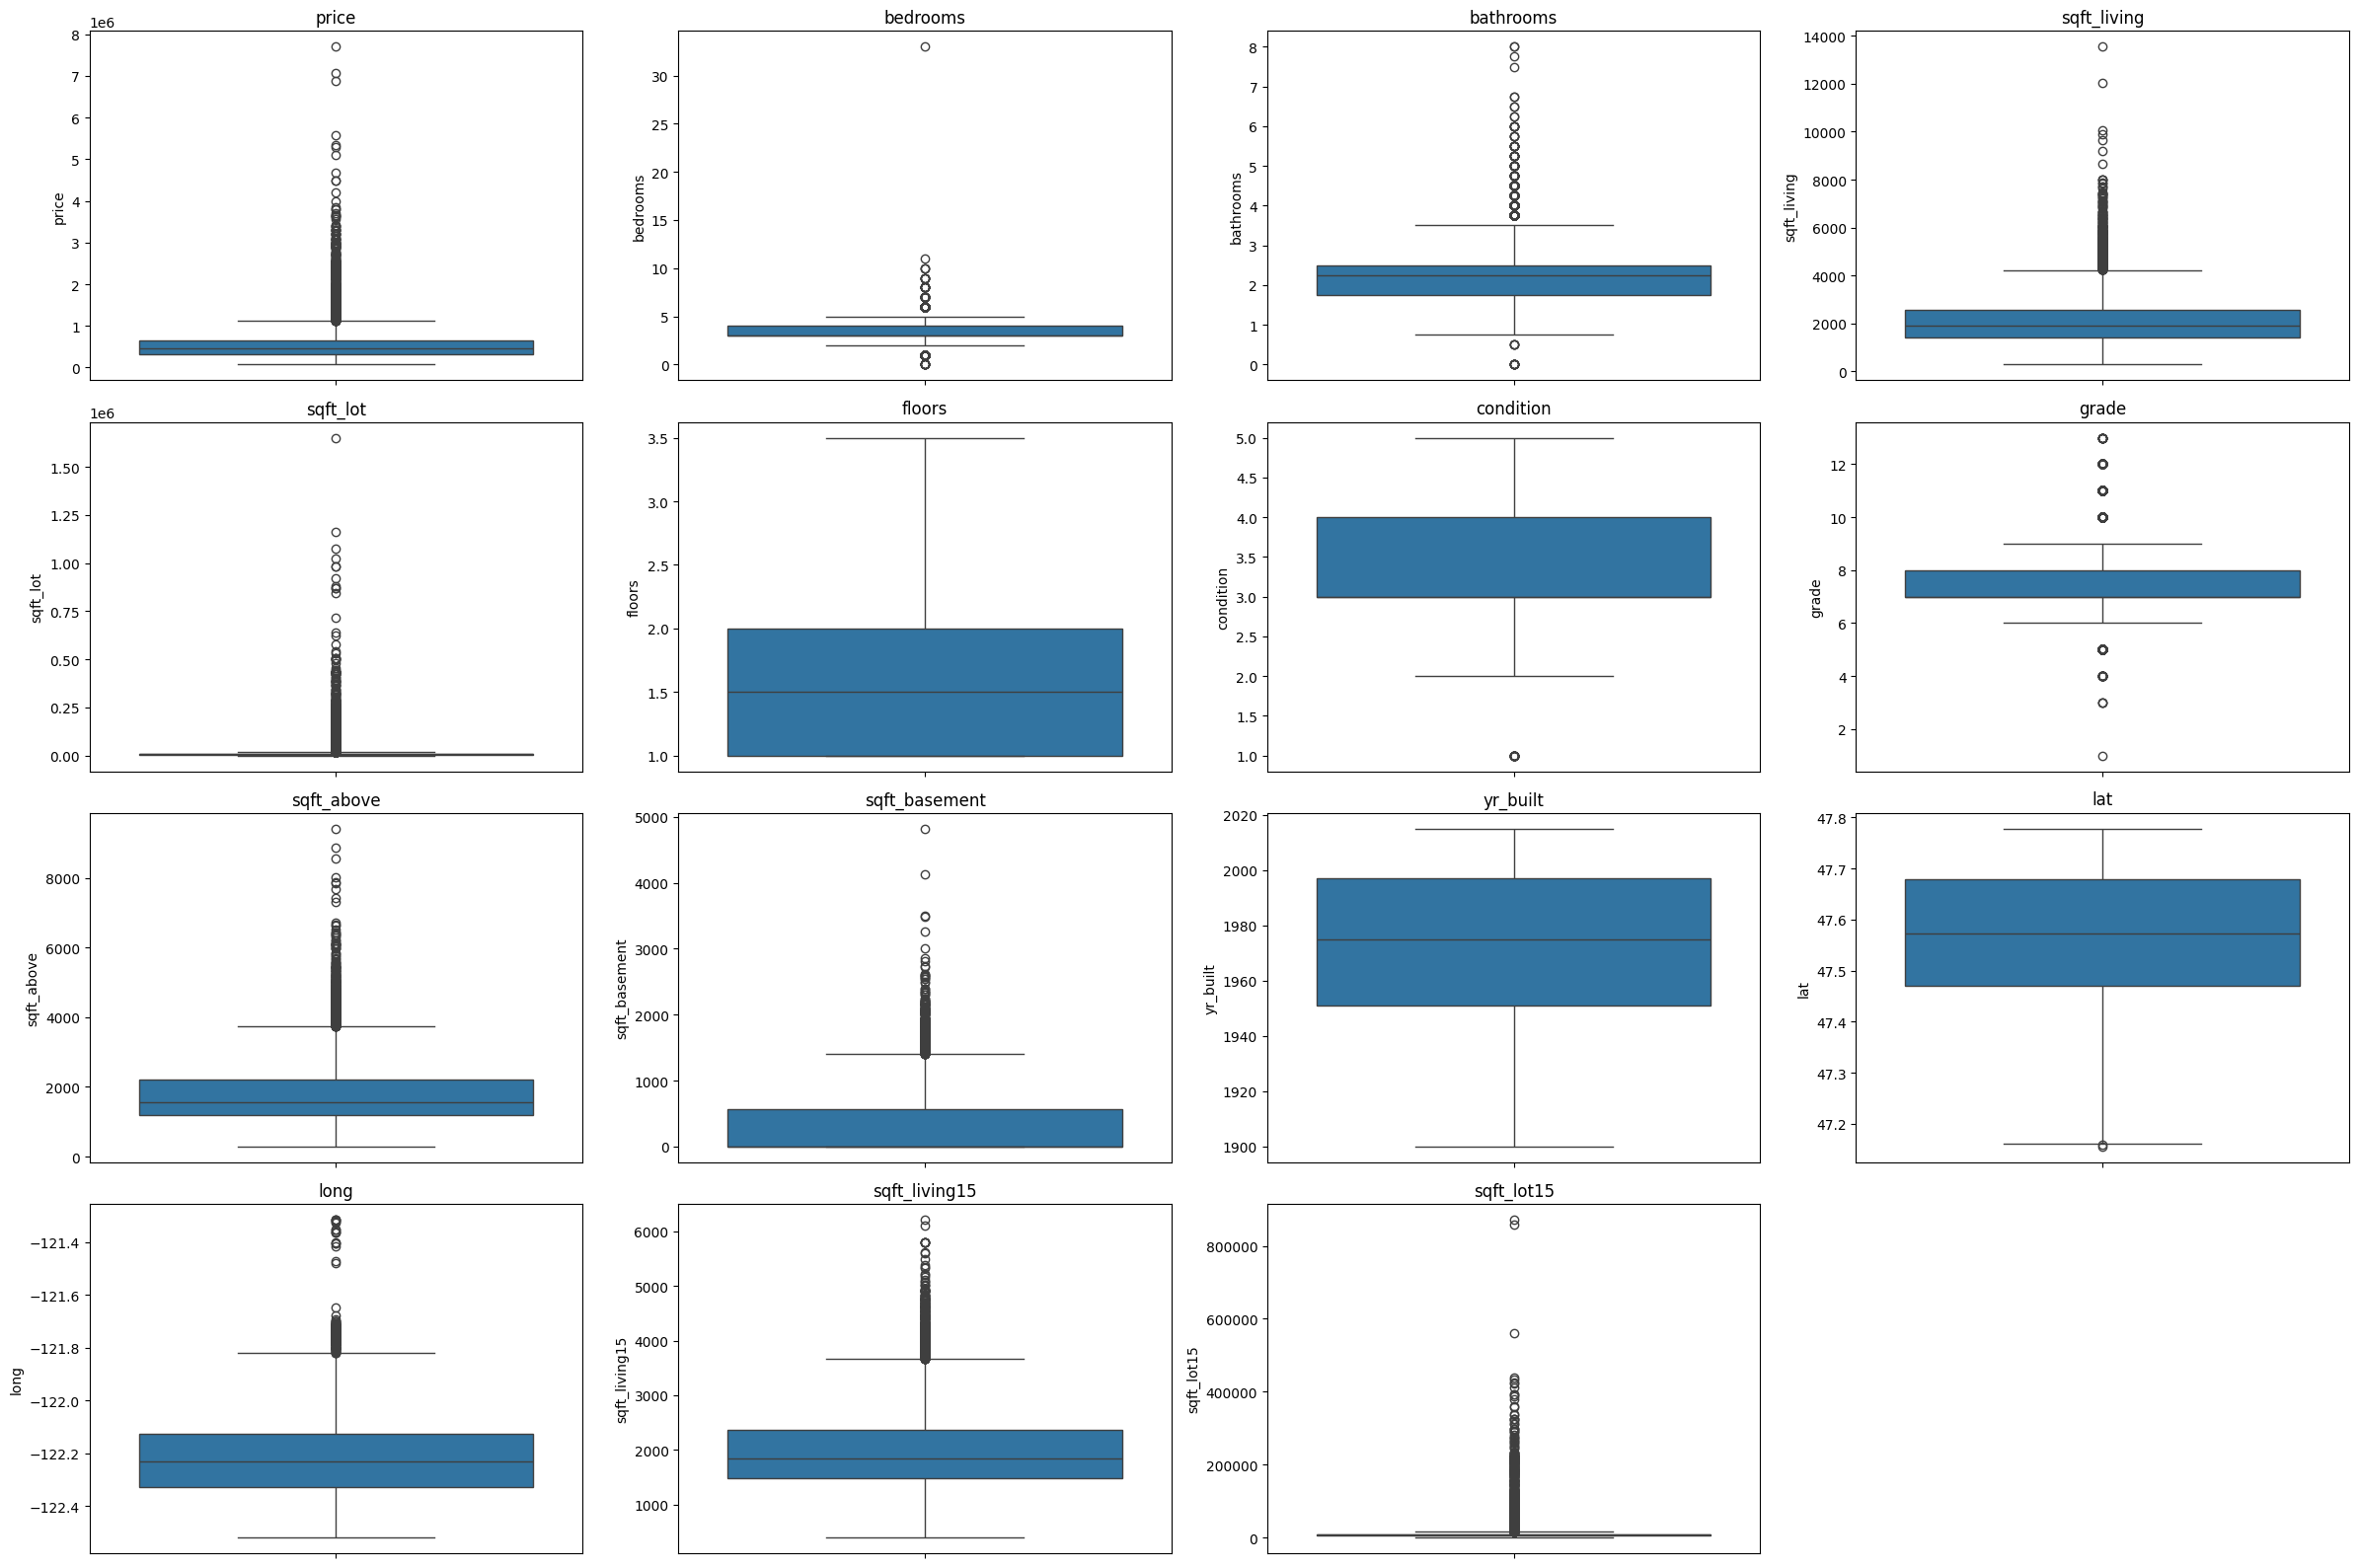

In [21]:
plt.figure(figsize=(24, 16))
for feature in df.drop('date',axis=1).columns.to_list():
    plt.subplot(4, 4, df.columns.to_list().index(feature))
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   condition      21613 non-null  int64         
 8   grade          21613 non-null  int64         
 9   sqft_above     21613 non-null  int64         
 10  sqft_basement  21613 non-null  int64         
 11  yr_built       21613 non-null  int64         
 12  lat            21613 non-null  float64       
 13  long           21613 non-null  float64       
 14  sqft_living15  21613 non-null  int64         
 15  sqft_lot15     2161

In [23]:
datetime_column = df['date'] 


numeric_columns = df.drop(["grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

In [24]:
numeric_data = scaled_df[numeric_columns]
transformer = PowerTransformer(method = "yeo-johnson")
transformed_numeric_data = transformer.fit_transform(numeric_data)
transformed_df = pd.DataFrame(transformed_numeric_data, columns=numeric_columns)
transformed_df['date'] = datetime_column
transformed_df[['grade','condition','floors','bathrooms','bedrooms']] = df[['grade','condition','floors','bathrooms','bedrooms']]

In [25]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

In [26]:
transformed_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date',
       'grade', 'condition', 'floors', 'bathrooms', 'bedrooms'],
      dtype='object')

In [27]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(transformed_df,featsure))

In [28]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [29]:
transformed_df = remove(transformed_df,index_list)

In [30]:
transformed_df.shape

(20698, 16)

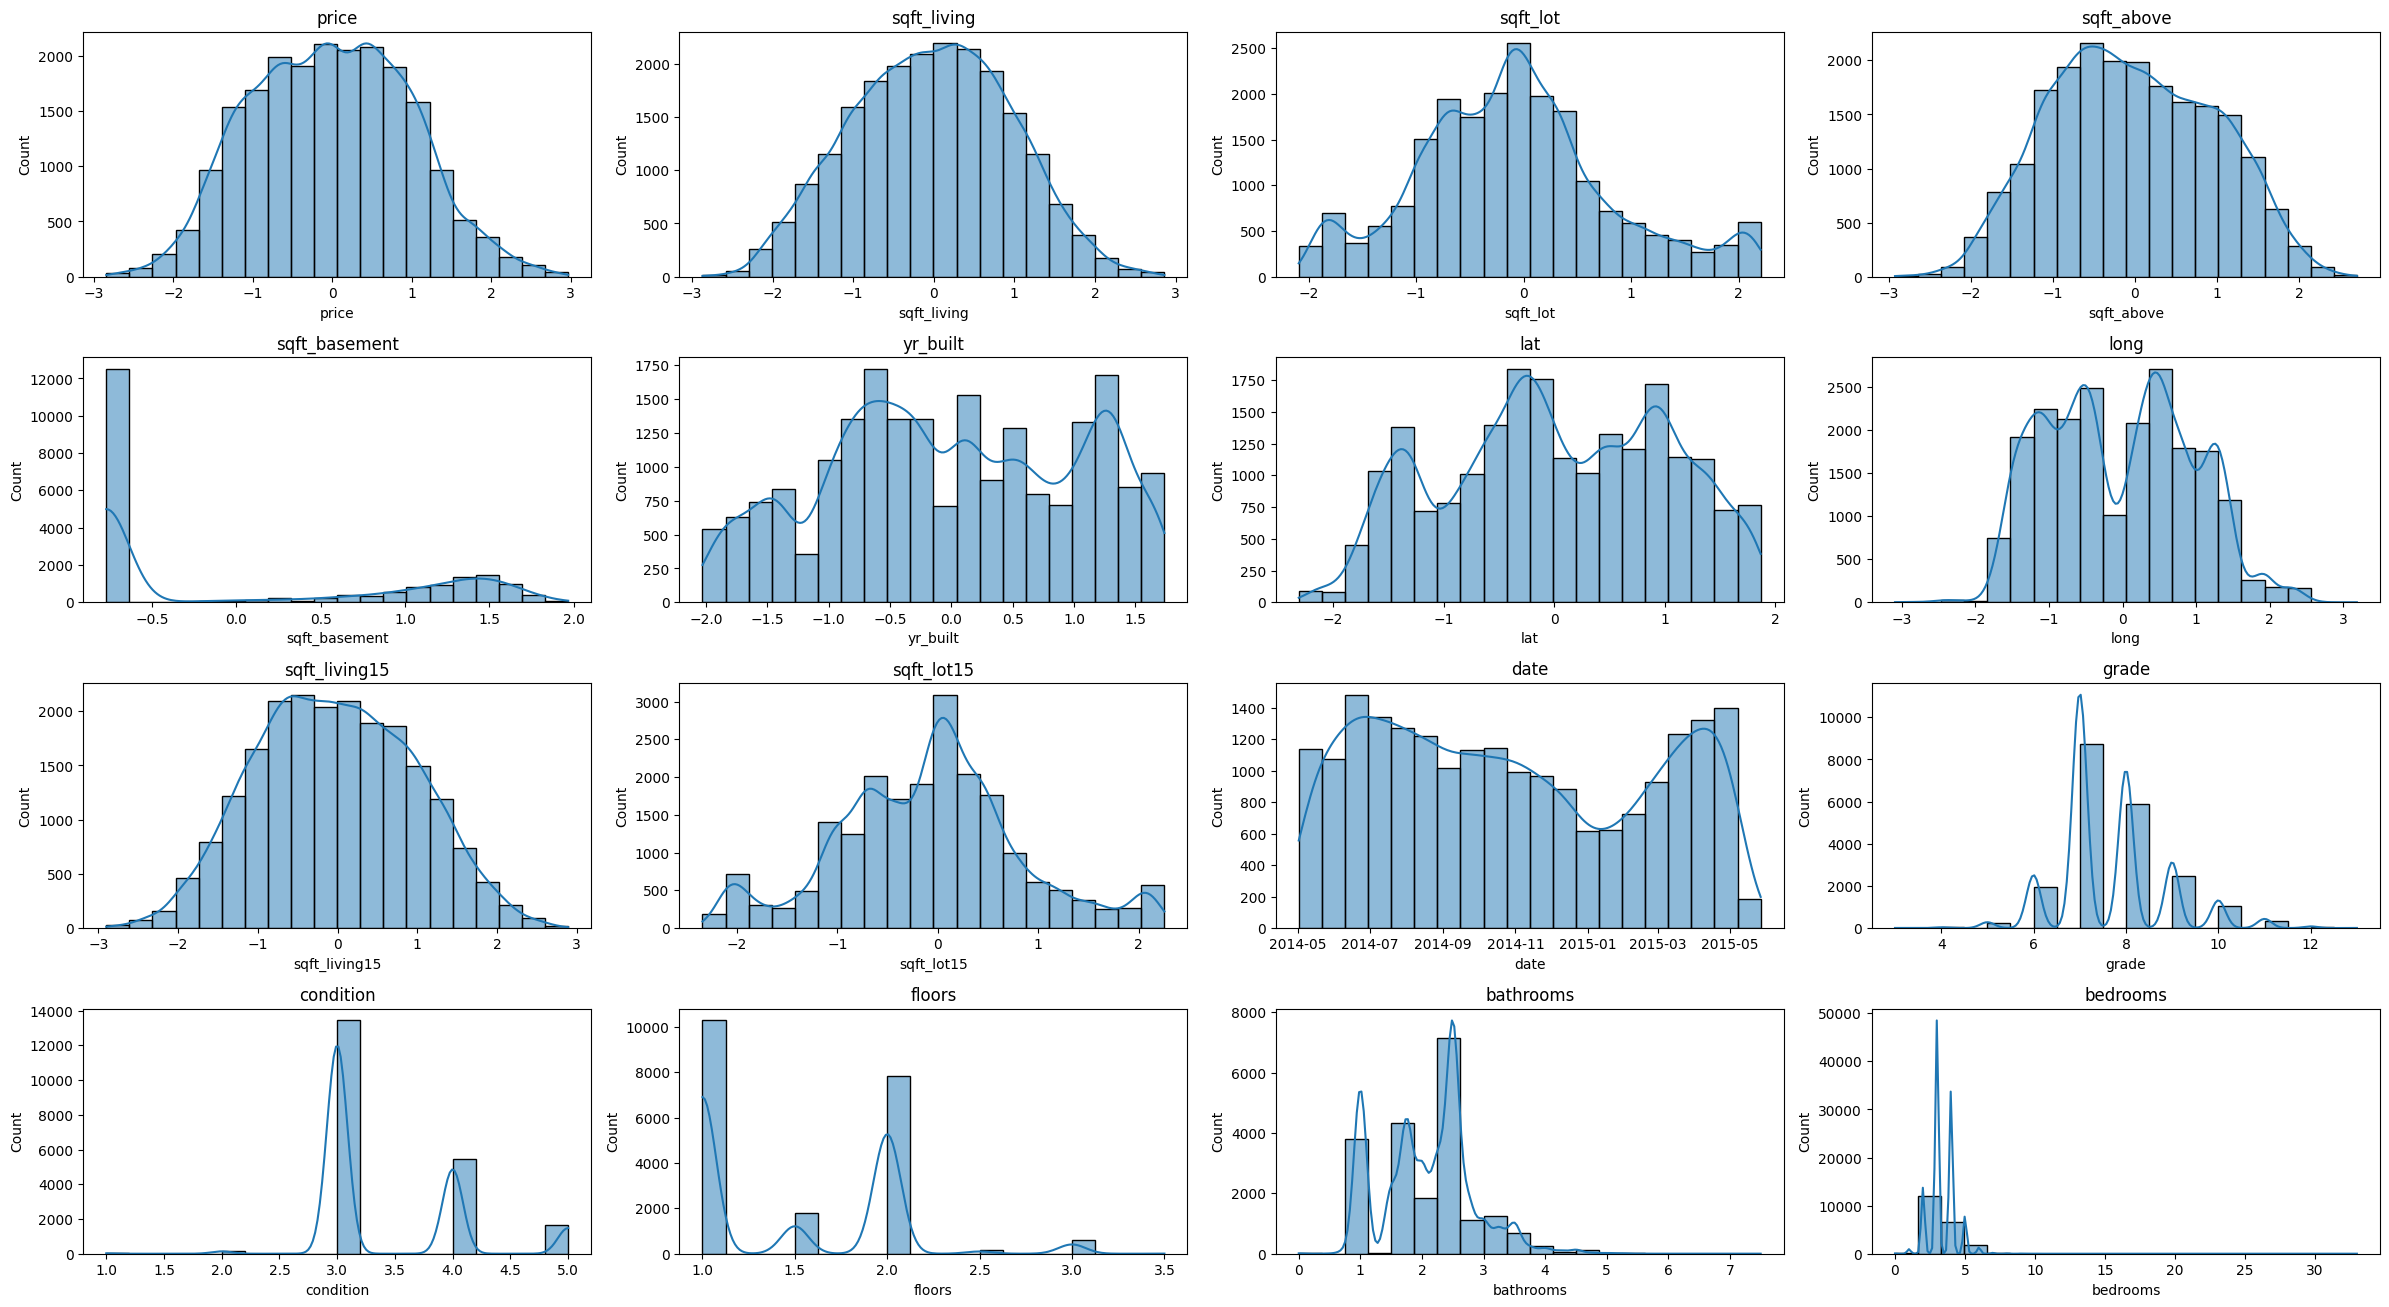

In [31]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=transformed_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

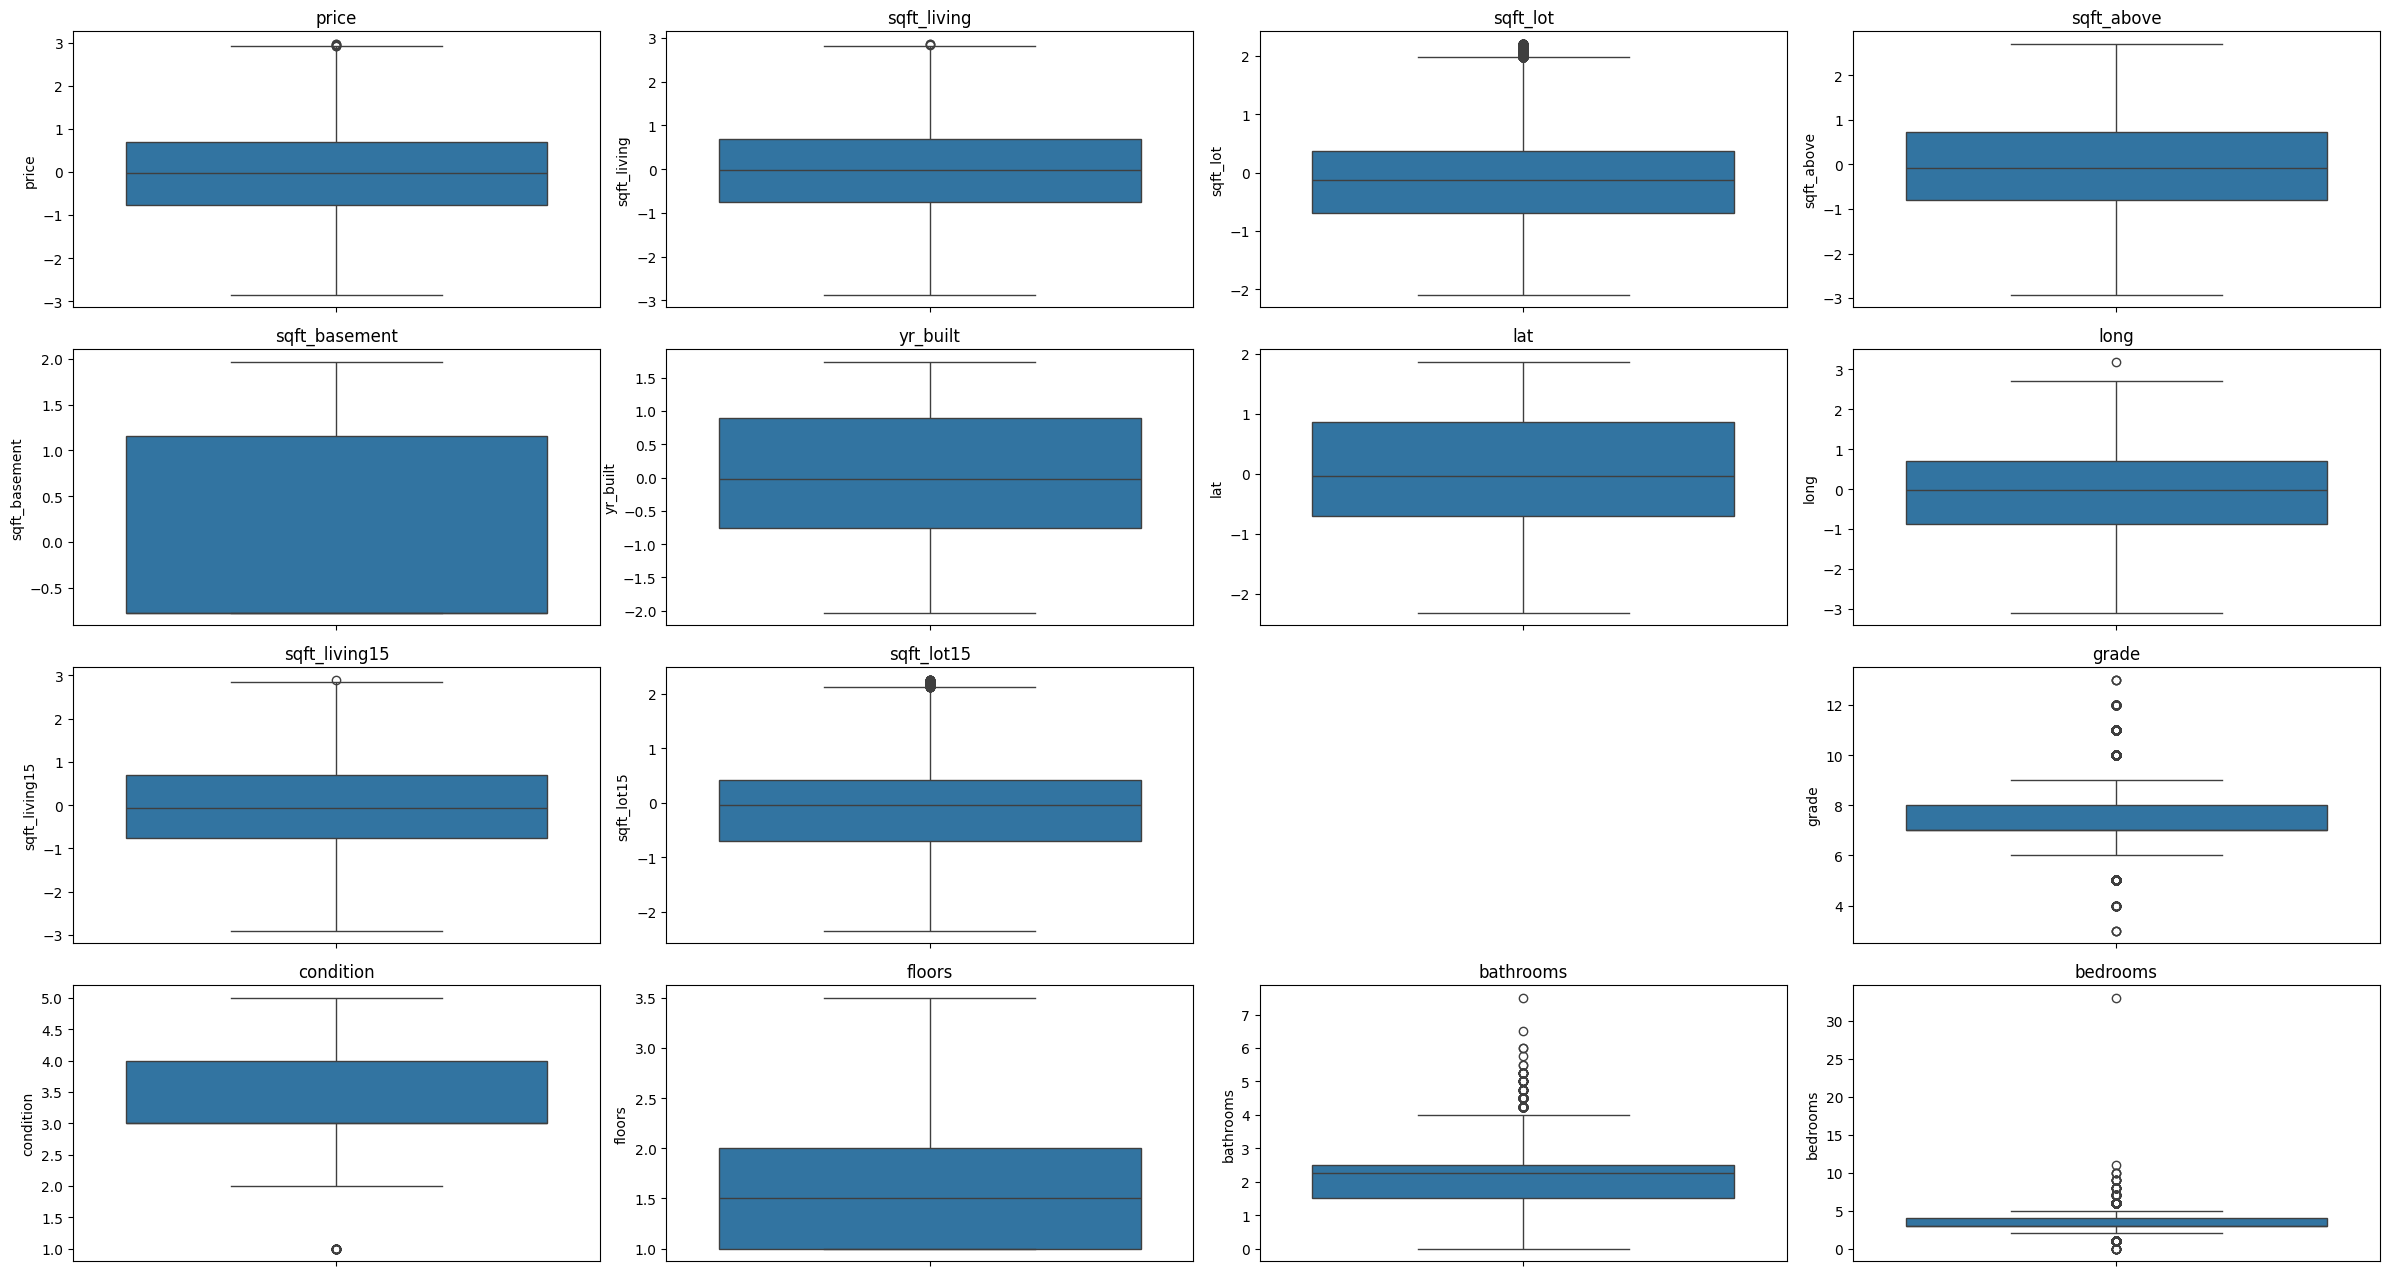

In [32]:
plt.figure(figsize=(24, 16))
for feature in transformed_df.drop('date',axis=1).columns.to_list():
    plt.subplot(5, 4, transformed_df.columns.to_list().index(feature)+1)
    sns.boxplot(data=transformed_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

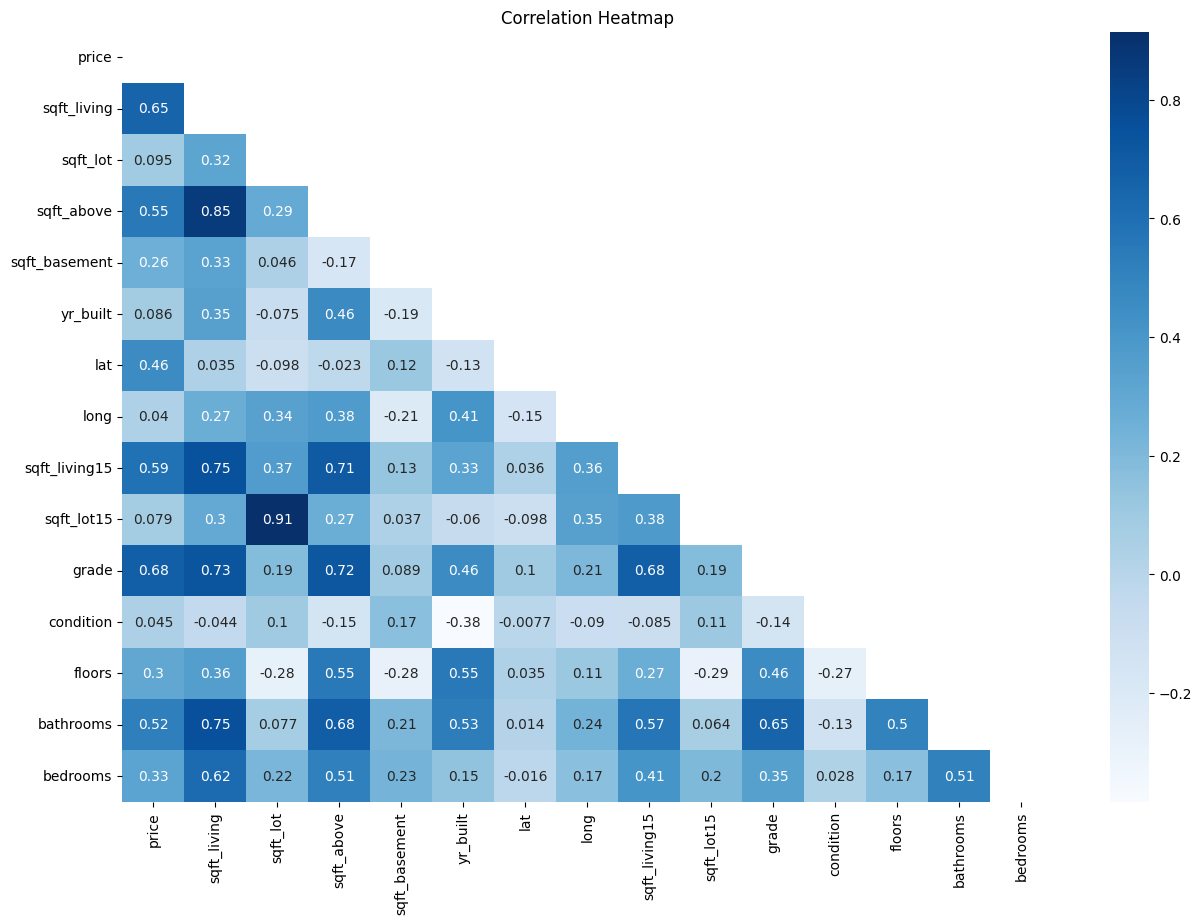

In [33]:
correlation_matrix = transformed_df.corr()
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
#'sqft_above','sqft_living15','grade','bathrooms'
transformed_df.drop(['sqft_above','sqft_living15','sqft_lot15','date'],axis=1,inplace=True)

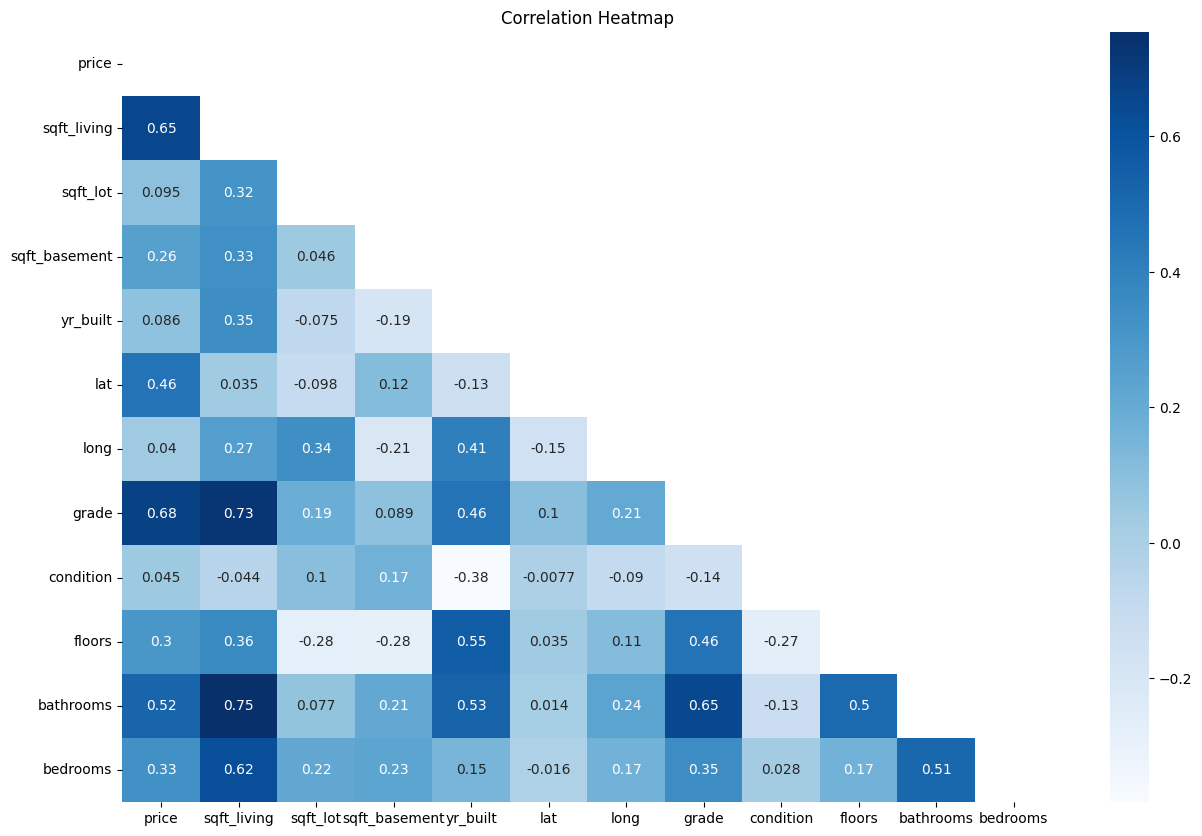

In [35]:
# after deleting the column that have hige correlation
correlation_matrix = transformed_df.corr()
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**Modelling**

Splitting  the data

In [36]:
target = 'price'
X = transformed_df.drop(columns=[target])
y = transformed_df[target]


In [37]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.25 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (15523, 11)
y_train shape: (15523,)
X_test shape: (5175, 11)
y_test shape: (5175,)


Linear Regression

In [38]:
Lrg = LinearRegression()
Lrg.fit(X_train , y_train)      # Fitting model with X_train and y_train
y_pred = Lrg.predict(X_test)    # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))  # mean_squared_error
print('MAE:', mean_absolute_error(y_test , y_pred),)                        # mean_absolute_error
print('r2 score: %.2f' % r2_score(y_test, y_pred))                          # r2_score
print("Accuracy :",Lrg.score(X_test, y_test))                               # accuracy

RMSE: 0.7189651894658223
MAE: 0.40577628601691346
r2 score: 0.73
Accuracy : 0.7301491590910199


In [39]:
cv=cross_val_score(Lrg, X, y,cv=5)  # cross_val_score
cv

array([0.72481897, 0.71633168, 0.72268783, 0.72871558, 0.72896409])

In [40]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.7243036340912272


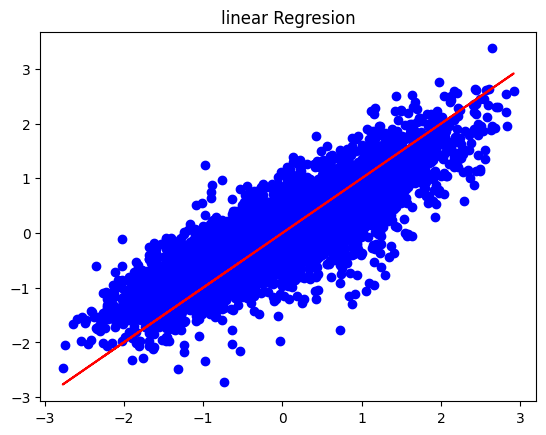

In [41]:
plt.scatter(y_test,y_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("linear Regresion");

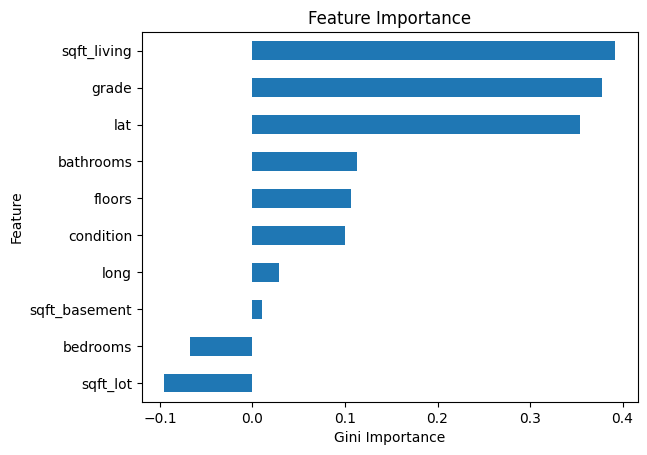

In [42]:
# the importance of fetueres
importances = Lrg.coef_
features = X_test.columns
feat_imp = pd.Series(importances , index= features)
feat_imp.sort_values().tail(10).plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

Decision Tree

In [43]:
dtree_up = DecisionTreeRegressor()
dtree_up.fit(X_train, y_train)
dtree_pred_up = dtree_up.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred_up, squared=False)))
print('MAE:', mean_absolute_error(y_test , dtree_pred_up),)
print('r2 score: %.2f' % r2_score(y_test, dtree_pred_up))
print("Accuracy :",dtree_up.score(X_test, y_test))

RMSE: 0.6782127387167962
MAE: 0.33004374643045076
r2 score: 0.79
Accuracy : 0.7863238287544728


In [44]:
d = np.arange(1, 21, 1)

dtree = DecisionTreeRegressor(random_state=5)
hyperParam = [{'max_depth':d}]

gsv = GridSearchCV(dtree,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(X_train, y_train)
dtree_pred_mms = best_model.best_estimator_.predict(X_test)

print("Best HyperParameter: ",gsv.best_params_)

print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred_mms, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, dtree_pred_mms))
print("Accuracy :",best_model.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best HyperParameter:  {'max_depth': 9}
RMSE: 0.6343897684443863
r2 score: 0.84
Accuracy : 0.8364249724851713


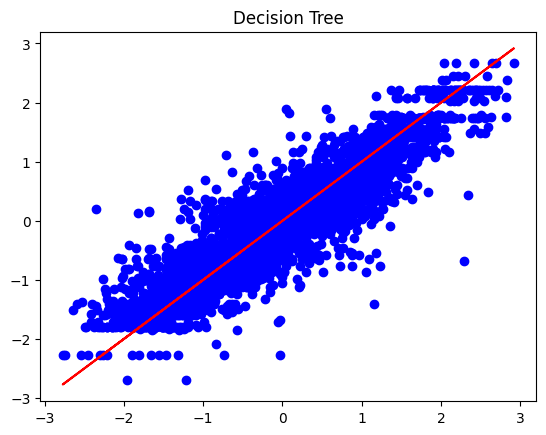

In [45]:
# Decision Tree graph
plt.scatter(y_test,dtree_pred_mms, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("Decision Tree");

Random Forest

In [48]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred, squared=False)))
print('MAE:', mean_absolute_error(y_test , rf_pred),)
print('r2 score: %.2f' % r2_score(y_test, rf_pred))
print("Accuracy :",rf.score(X_test, y_test))

RMSE: 0.576879939799213
MAE: 0.2365299738144471
r2 score: 0.89
Accuracy : 0.8881504938192055


In [49]:
cv=cross_val_score(rf, X, y,cv=10)
cv

array([0.87813835, 0.8942195 , 0.88322291, 0.88484067, 0.87301969,
       0.88842605, 0.8940556 , 0.89228883, 0.89209762, 0.88962722])

In [50]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8869936423189845


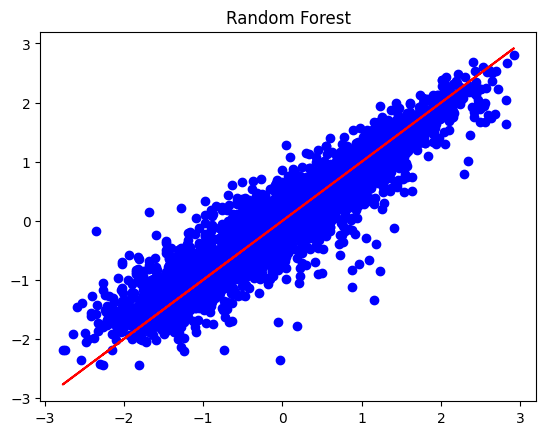

In [51]:
# RF graph
plt.scatter(y_test,rf_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("Random Forest");

XGBOOST

In [52]:
xgb = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)
xgb.fit(X_train , y_train);
y_xgb_pred=xgb.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_xgb_pred, squared=False)))
print('MAE:', mean_absolute_error(y_test , y_xgb_pred),)
print('r2 score: %.2f' % r2_score(y_test, y_xgb_pred))
print("Accuracy :", xgb.score(X_test, y_test))

RMSE: 0.5604071005885818
MAE: 0.22407637377187223
r2 score: 0.90
Accuracy : 0.9003891056412091


In [53]:
cv=cross_val_score(xgb, X, y,cv=10)
cv

array([0.89401534, 0.9002998 , 0.89641432, 0.89445628, 0.88916092,
       0.89580249, 0.90270932, 0.9029888 , 0.90108846, 0.90781764])

In [54]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8984753354055186


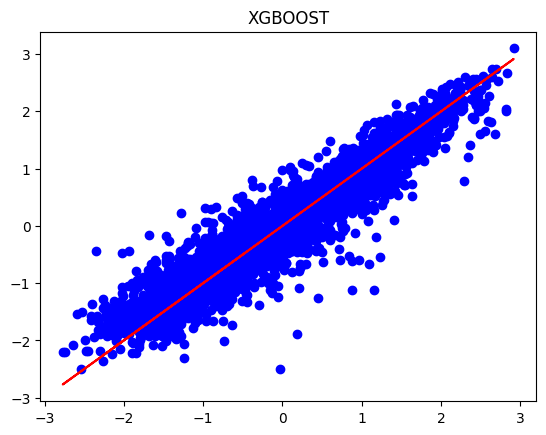

In [55]:
# XGB graph
plt.scatter(y_test,y_xgb_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("XGBOOST");

KNN

In [56]:
kn= KNN(n_neighbors=7,weights="uniform",metric="manhattan")
kn.fit(X_train , y_train)
y_kn_pred = kn.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_kn_pred, squared=False)))
print('MAE:', mean_absolute_error(y_test , y_kn_pred),)
print('r2 score: %.2f' % r2_score(y_test, y_kn_pred))
print("Accuracy :", kn.score(X_test, y_test))

RMSE: 0.6230843926785109
MAE: 0.2835741891737069
r2 score: 0.85
Accuracy : 0.8477771622015706


In [57]:
# cross_val_score
cv=cross_val_score(kn, X, y,cv=10)
cv

array([0.83364055, 0.84858174, 0.84287388, 0.83455751, 0.82763573,
       0.84930554, 0.84453363, 0.8446541 , 0.84647093, 0.83079554])

In [58]:
print("the mean of cross_val_score is ",cv.mean())

the mean of cross_val_score is  0.8403049154626551


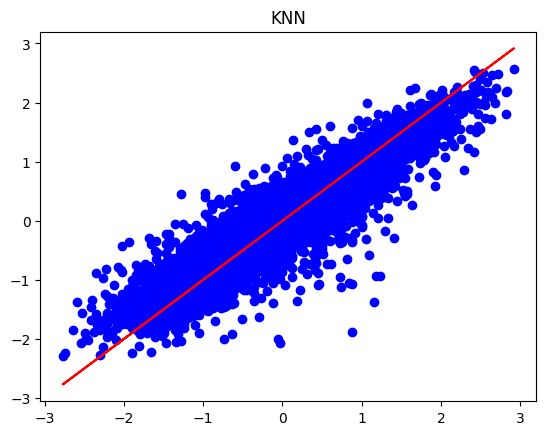

In [59]:
# KNN graph
plt.scatter(y_test,y_kn_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("KNN");

dataset source: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/